Install libraries

In [2]:
! pip install -q -U google-generativeai

Import libararies

In [6]:
import pathlib
import textwrap

import google.generativeai as genai

from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('.','*')
  return Markdown(textwrap.indent(text,'>', predicate=lambda _:True))

In [7]:
import os
os.environ['GOOGLE_API_KEY'] = '<Enter your key>'

In [10]:
genai.configure(api_key=os.environ['GOOGLE_API_KEY'])

List of all models

In [11]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


Generate text from text inputs

In [14]:
model= genai.GenerativeModel('gemini-pro')
model

 genai.GenerativeModel(
   model_name='models/gemini-pro',
   generation_config={}.
   safety_settings={}
)

In [13]:
%%time
response = model.generate_content("What is an LLM")

CPU times: user 167 ms, sys: 21.9 ms, total: 188 ms
Wall time: 11 s


In [15]:
response

In [17]:
to_markdown(response.text)

>LLM stands for Large Language Model* It is a type of artificial intelligence (AI) that has been trained on massive amounts of text data to perform a variety of language-related tasks, such as generating text, translating languages, answering questions, and summarizing text* LLMs are trained using unsupervised learning, which means that they are not explicitly taught to perform any specific tasks* Instead, they learn by finding patterns and relationships in the data they are trained on* This allows them to generalize to new tasks and perform them well, even if they have never been specifically trained on those tasks*
>
>Some of the most well-known LLMs include GPT-3, developed by OpenAI, and BERT, developed by Google* These models have been used to create a wide range of AI-powered applications, such as chatbots, language translation services, and text summarization tools*
>
>LLMs are still under development, but they have the potential to revolutionize the way we interact with computers and information* As they continue to improve, we can expect to see even more innovative and useful applications of LLMs in the future*
>
>Here are some of the key characteristics of LLMs:
>
>* **They are trained on massive amounts of text data*** This allows them to learn a wide range of language patterns and relationships*
>* **They are unsupervised learning models*** This means that they are not explicitly taught to perform any specific tasks* Instead, they learn by finding patterns and relationships in the data they are trained on*
>* **They are able to generalize to new tasks*** This means that they can perform tasks that they have never been specifically trained on*
>* **They are able to generate text, translate languages, answer questions, and summarize text*** These are just a few of the many tasks that LLMs can perform*
>
>LLMs are a powerful new tool for natural language processing* They have the potential to revolutionize the way we interact with computers and information*

Response Feedback

In [18]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

In [19]:
response.candidates

[content {
  parts {
    text: "LLM stands for Large Language Model. It is a type of artificial intelligence (AI) that has been trained on massive amounts of text data to perform a variety of language-related tasks, such as generating text, translating languages, answering questions, and summarizing text. LLMs are trained using unsupervised learning, which means that they are not explicitly taught to perform any specific tasks. Instead, they learn by finding patterns and relationships in the data they are trained on. This allows them to generalize to new tasks and perform them well, even if they have never been specifically trained on those tasks.\n\nSome of the most well-known LLMs include GPT-3, developed by OpenAI, and BERT, developed by Google. These models have been used to create a wide range of AI-powered applications, such as chatbots, language translation services, and text summarization tools.\n\nLLMs are still under development, but they have the potential to revolutionize t

Stream response while being created

In [20]:
response = model.generate_content("What are different types of LLMs",stream=True)

In [21]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

1. **Auto-Regressive Language Models (AR LMs):** AR
________________________________________________________________________________
 LMs generate text one word at a time, predicting the next word based on the words that came before it. This allows them to generate coherent and grammatically
________________________________________________________________________________
 correct text. Examples of AR LMs include GPT-3, GPT-J, and BERT.

2. **Non-Auto-Regressive Language Models (NAR LMs):** NAR LMs generate text in a single step, without having to predict each word sequentially. This makes them faster and more efficient than
________________________________________________________________________________
 AR LMs. However, they can sometimes generate less coherent and grammatically correct text. Examples of NAR LMs include T5, XLNet, and RoBERTa.

3. **Masked Language Models (MLMs):** MLMs are trained to predict missing words in a given text. This helps them learn the relationships betwe

Generate text from image and text inputs

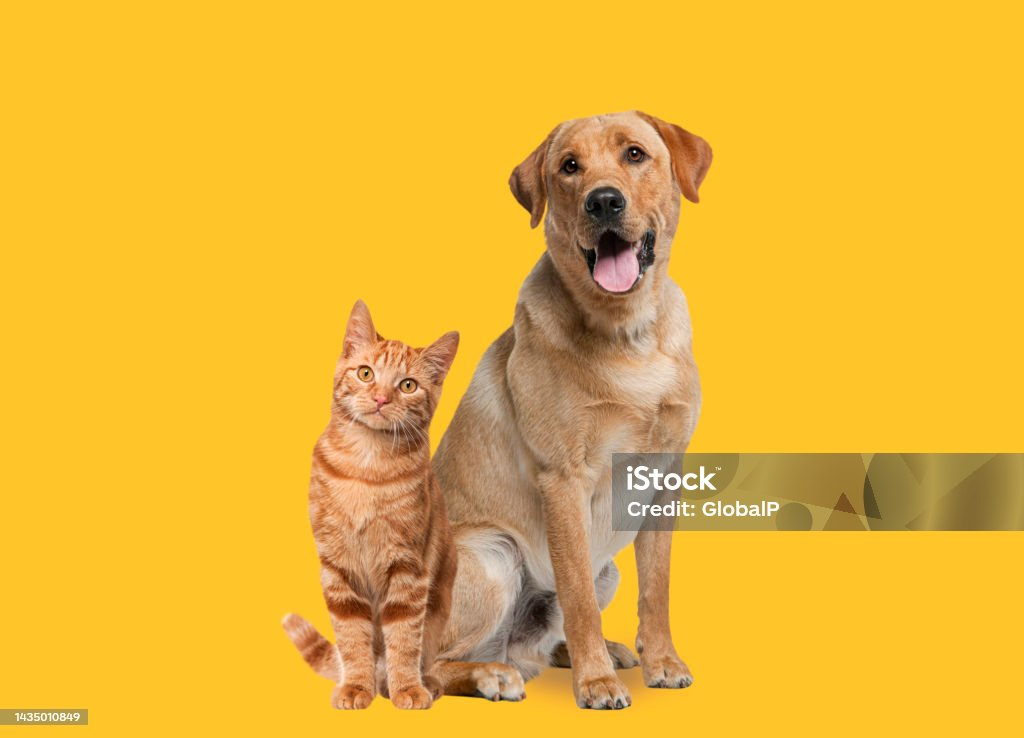

In [25]:
import PIL.Image

img = PIL.Image.open('/geminisample.jpg')
img

In [26]:
model = genai.GenerativeModel('gemini-pro-vision')

In [27]:
response = model.generate_content(img)
to_markdown(response.text)

> A ginger cat and a golden brown dog sitting together on a yellow background*

Both text and image in same prompt

In [31]:
response = model.generate_content(["Write a short, engaging blog post on this picture", img], stream=True)
response.resolve()

In [32]:
to_markdown(response.text)

> **A Cat and a Dog: Best Friends Forever**
>
>Cats and dogs are often thought of as natural enemies, but this adorable photo proves that they can be the best of friends* This cat and dog are clearly enjoying each other's company, and they look like they're having a great time*
>
>This photo is a reminder that animals are capable of great love and compassion* It's also a reminder that we should never judge a book by its cover* Just because two animals are different doesn't mean they can't be friends*
>
>If you're looking for a heartwarming story to brighten your day, look no further than this photo of a cat and a dog being best friends* It's sure to put a smile on your face*

Chat conversations

In [33]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

In [35]:
response = chat.send_message("What is MLOPs in one sentence")
to_markdown(response.text)

>MLOps is a set of practices that aims to automate and manage the lifecycle of machine learning models*

In [36]:
chat.history

[parts {
   text: "What is MLOPs in one sentence"
 }
 role: "user",
 parts {
   text: "MLOps is a set of practices that aims to automate and manage the lifecycle of machine learning models."
 }
 role: "model"]

In [37]:
response = chat.send_message("Okay, how about a more detailed explanation to a high schooler?", stream=True)

for chunk in response:
  print(chunk.text)
  print("_"*80)

MLOps is like a team of engineers and scientists who work together to make
________________________________________________________________________________
 sure that machine learning models are working properly and are useful to people. They make sure that the models are trained correctly, that they are deployed to the right places
________________________________________________________________________________
, and that they are monitored to make sure they are working as expected. They also make sure that the models are updated regularly with new data so that they can continue to learn and improve.

Here's an analogy:

Imagine you have a self-driving car. MLOps is like the team of engineers
________________________________________________________________________________
 and scientists who designed, built, and tested the car. They made sure that the car was safe, reliable, and could drive itself correctly. They also made sure that the car could learn and improve over time by collect

In [38]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

>**user**: What is MLOPs in one sentence

>**model**: MLOps is a set of practices that aims to automate and manage the lifecycle of machine learning models*

>**user**: Okay, how about a more detailed explanation to a high schooler?

>**model**: MLOps is like a team of engineers and scientists who work together to make sure that machine learning models are working properly and are useful to people* They make sure that the models are trained correctly, that they are deployed to the right places, and that they are monitored to make sure they are working as expected* They also make sure that the models are updated regularly with new data so that they can continue to learn and improve*
>
>Here's an analogy:
>
>Imagine you have a self-driving car* MLOps is like the team of engineers and scientists who designed, built, and tested the car* They made sure that the car was safe, reliable, and could drive itself correctly* They also made sure that the car could learn and improve over time by collecting data from its sensors and using that data to update its software*
>
>In the same way, MLOps is responsible for making sure that machine learning models are working properly and are useful to people* They make sure that the models are trained correctly, that they are deployed to the right places, and that they are monitored to make sure they are working as expected* They also make sure that the models are updated regularly with new data so that they can continue to learn and improve*
>
>MLOps is a new field, but it is becoming increasingly important as machine learning models are used in more and more applications*

Count Tokens

In [39]:
model.count_tokens("Where is the taj mahal")

total_tokens: 5

In [41]:
model.count_tokens(chat.history)

total_tokens: 326